In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vizman import viz
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler
import seaborn as sns

import utils as ut

default_things: str = "../Pyvizman/vizman/"
default_colors: dict = viz.load_data_from_json(default_things + "colors.json")

viz.set_visual_style(
    json_color_path=default_things + "colors.json", change_colors=False
)

cycling_colors = [
    default_colors["warms"]["DEEP_RED"],
    default_colors["warms"]["LECKER_RED"],
    default_colors["warms"]["ORANGE"],
    default_colors["warms"]["YELLOW"],
    default_colors["warms"]["SAND"],
    default_colors["purples"]["PURPLE"],
    default_colors["colds"]["DEEP_BLUE"],
    default_colors["colds"]["NIGHT_BLUE"],
    default_colors["colds"]["LAKE_BLUE"],
    default_colors["colds"]["TEAL"],
    default_colors["neutrals"]["GRAY"],
    default_colors["neutrals"]["OLIVE_GRAY"],
    default_colors["neutrals"]["HALF_BLACK"],
]
matplotlib.rcParams["axes.prop_cycle"] = cycler(color=cycling_colors)

In [3]:
network_type:str = "weighted" # binary or weighted

In [4]:
distance_datasets_path: str = f"datasets/{network_type}/distance_mat/"
distance_synthetic_path: str = f"datasets/{network_type}/distance_mat/distance_mat_synthetic.npy"

In [5]:
global_efficiency_datasets, diameter_datasets = ut.preprocess_for_distance(
    distance_datasets_path, distance_synthetic_path, "distance_mat_"
)

In [6]:
global_efficiency_datasets.rename(columns={'distance_mat__global_efficiency': 'global_efficiency'}, inplace=True)
diameter_datasets.rename(columns={'distance_mat__diameter': 'diameter'}, inplace=True)

In [7]:
diameter_datasets

,condition,reciprocity,diameter
6,human_033,0.0,2.000056
19,human_033,0.1,2.561335
32,human_033,0.2,2.545596
45,human_033,0.3,2.671871
58,human_033,0.4,2.725808
...,...,...,...
90,modular,0.6,1.220046
103,modular,0.7,1.234231
116,modular,0.8,1.204378
129,modular,0.9,1.174758


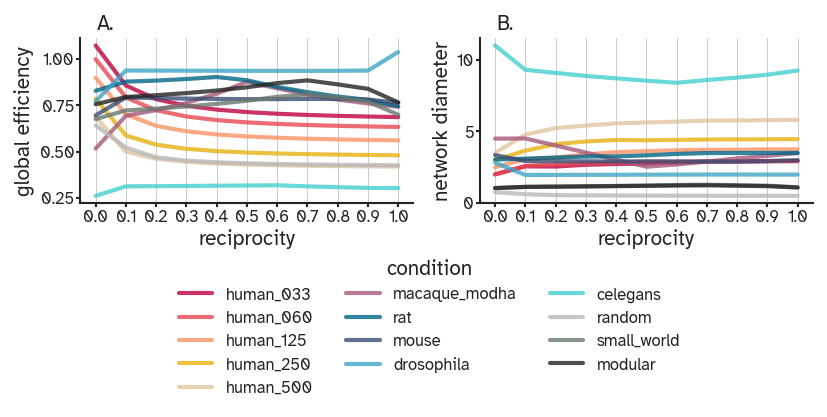

In [8]:
fig, axes = plt.subplot_mosaic([["A", "B"],
                                [".", "."]],
                               figsize=viz.cm_to_inch([16,8]),
                               dpi=150)
sns.lineplot(data=global_efficiency_datasets, x='reciprocity', y='global_efficiency', hue='condition',legend='brief',linewidth=2,alpha=0.8,ax=axes['A'])
sns.lineplot(data=diameter_datasets, x='reciprocity', y='diameter', hue='condition',legend=False,linewidth=2,alpha=0.8,ax=axes['B'])

sns.move_legend(axes['A'],loc="upper left",bbox_to_anchor=(0.25, -0.25),frameon=False,ncols=3)
axes['A'].grid(axis='x', linewidth=0.5)
axes['B'].grid(axis='x', linewidth=0.5)

axes['A'].annotate('A.', xy=(0.05, 1.05), xycoords="axes fraction")
axes['B'].annotate('B.', xy=(0.05, 1.05), xycoords="axes fraction")

axes['A'].set_ylabel('global efficiency')
axes['B'].set_ylabel('network diameter')
sns.despine(fig=fig)

plt.savefig(f"figures/{network_type}/path_metrics.pdf",bbox_inches='tight', dpi=600)